# Question 7
## Part A

In [8]:
import numpy as np

lambda_list = [0.001,0.01,0.1,.25,.5,.75,1,2,3,5]
hiddenSize = 10
epoch_list = list(range(0,10000,100))
hiddenSize_list = list(range(1,11,1))

def sigmoid(x):
    rv = 1/(1+np.exp(-x))
    return rv



def deriv_sigmoid(output):
    return output*(1-output)

def predict(X,alpha,beta):
        l_0 = X
        l_1 = sigmoid(np.dot(l_0,alpha))
        l_2 = sigmoid(np.dot(l_1,beta))
        return l_2
    
def Neural_backprop(itera, hiddenSize, X, y, eta, Lambda):

    alpha_t = 2*np.random.random((3,hiddenSize)) - 1
    beta_t = 2*np.random.random((hiddenSize,1)) - 1
    alpha_t_1 = alpha_t.copy()
    beta_t_1 = beta_t.copy()
    for j in range(itera):
        l_0 = X
        l_1 = sigmoid(np.dot(l_0,alpha_t))
        l_2 = sigmoid(np.dot(l_1,beta_t))
        l_2_error = l_2 - y
        l_2_delta = l_2_error*deriv_sigmoid(l_2)
        l_1_error = l_2_delta.dot(beta_t.T)
        l_1_delta = l_1_error * deriv_sigmoid(l_1)
        beta_t= beta_t_1*(1- 2*Lambda*eta) + eta * (l_1.T.dot(l_2_delta))
        alpha_t = alpha_t_1*(1- 2*Lambda*eta) + eta*(l_0.T.dot(l_1_delta))
    #mean_sq_error = (l_2_error.copy())**2
    #mean_sq_error = np.mean(mean_sq_error)
    return alpha_t,beta_t




In [9]:
l_2_delta = l_2_error*deriv_sigmoid(l_2)

NameError: name 'l_2_error' is not defined

## Part B

In [10]:
def dgp(n):
    x1 = np.random.normal(0,1,n)
    x2 = np.random.normal(0,1,n)
    X = np.concatenate((x1.reshape(n,1),x2.reshape(n,1)),axis=1)
    Z  = np.random.normal(0,1,n)
    a2 = np.zeros((2,1))
    a2[0][0]=3
    a2[1][0]=-3
    Y=sigmoid(3*X@np.ones((2,1))) +(X@a2)**2 + .3*Z.reshape(n,1)
    return (Y,X)
y_train, X_train = dgp(100)
X_train= np.concatenate((X_train,np.ones((100,1))),axis=1)
y_test, X_test = dgp(1000)
X_test= np.concatenate((X_test,np.ones((1000,1))),axis=1)

In [11]:
error_train_6000 = []
error_test_6000 = []
for i in lambda_list:
    alpha, beta = Neural_backprop(6000, 10, X_train, y_train, 0.01,i)
    sq_error_test_mean = np.mean((y_test - predict(X_test,alpha,beta))**2)
    sq_error_train_mean = np.mean((y_train - predict(X_train,alpha,beta))**2)
    error_test_6000.append(sq_error_test_mean)
    error_train_6000.append(sq_error_train_mean)
    
error_train_4000 = []
error_test_4000 = []
for i in lambda_list:
    alpha, beta = Neural_backprop(4000, 10, X_train, y_train, 0.01,i)
    sq_error_test_mean = np.mean((y_test - predict(X_test,alpha,beta))**2)
    sq_error_train_mean = np.mean((y_train - predict(X_train,alpha,beta))**2)
    error_test_4000.append(sq_error_test_mean)
    error_train_4000.append(sq_error_train_mean)
    
    
error_train_2000 = []
error_test_2000 = []
for i in lambda_list:
    alpha, beta = Neural_backprop(2000, 10, X_train, y_train, 0.01,i)
    sq_error_test_mean = np.mean((y_test - predict(X_test,alpha,beta))**2)
    sq_error_train_mean = np.mean((y_train - predict(X_train,alpha,beta))**2)
    error_test_2000.append(sq_error_test_mean)
    error_train_2000.append(sq_error_train_mean)
    
error_train_1000 = []
error_test_1000 = []
for i in lambda_list:
    alpha, beta = Neural_backprop(1000, 10, X_train, y_train, 0.01,i)
    sq_error_test_mean = np.mean((y_test - predict(X_test,alpha,beta))**2)
    sq_error_train_mean = np.mean((y_train - predict(X_train,alpha,beta))**2)
    error_test_1000.append(sq_error_test_mean)
    error_train_1000.append(sq_error_train_mean)
    

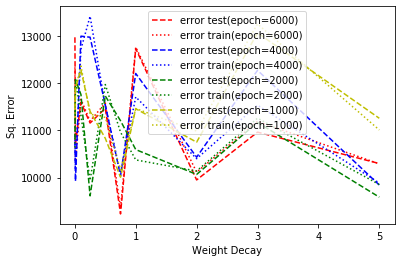

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(lambda_list,error_test_6000,color='r', ls='--' ,label='error test(epoch=6000)')
plt.plot(lambda_list,error_train_6000,color='r', ls=':', label='error train(epoch=6000)')
plt.plot(lambda_list,error_test_4000,color='b', ls='--', label='error test(epoch=4000)')
plt.plot(lambda_list,error_train_4000,color='b', ls=':', label='error train(epoch=4000)')
plt.plot(lambda_list,error_test_2000,color='g',ls='--', label='error test(epoch=2000)')
plt.plot(lambda_list,error_train_2000,color='g',ls=':', label='error train(epoch=2000)')
plt.plot(lambda_list,error_test_1000,color='y',ls='--', label='error test(epoch=1000)')
plt.plot(lambda_list,error_train_1000,color='y',ls=':', label='error train(epoch=1000)')
plt.xlabel('Weight Decay')
plt.ylabel("Sq. Error")
leg = ax.legend();

 We can see that as increase the weight decay have different behaviours depending how the amount of epochs we pass. For example between 0 and 1 we can see that very sharp movements for the train and test error levels for the simulations with lower number epochs which means that are more suspetible to overfitting.

## Part C

In [6]:
error_train_hn = []
error_test_hn = []
for i in hiddenSize_list:
    alpha, beta = Neural_backprop(6000, i, X_train, y_train, 0.01,.5)
    sq_error_test_mean = np.mean((y_test - predict(X_test,alpha,beta))**2)
    sq_error_train_mean = np.mean((y_train - predict(X_train,alpha,beta))**2)
    error_test_hn.append(sq_error_test_mean)
    error_train_hn.append(sq_error_train_mean)

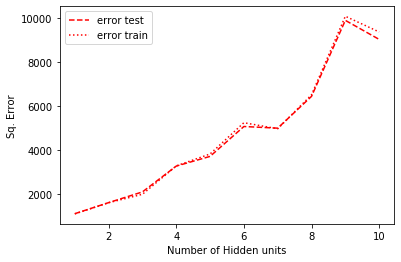

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(hiddenSize_list,error_test_hn,color='r', ls='--' ,label='error test')
plt.plot(hiddenSize_list,error_train_hn,color='r', ls=':', label='error train')
plt.xlabel('Number of Hidden units')
plt.ylabel("Sq. Error")
leg = ax.legend();

We can see that minimize at 9.